In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

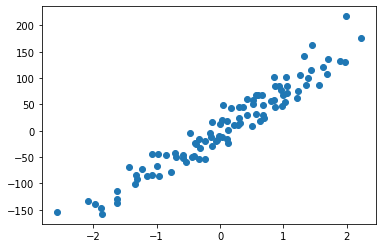

In [9]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=20, random_state=24)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=24)
plt.scatter(X, y)
plt.show()

In [14]:
def param_init(X):
    params = {}
    _, n_features = X.shape
    params["W"] = np.zeros(n_features)
    params["b"] = 0
    return params

In [39]:
def gradient_descent(X, y, params, alpha, n_iter):
    W = params["W"]
    b = params["b"]
    m = X.shape[0]
    for _ in range(n_iter):
        y_pred = np.dot(X, W) + b
        dW = (2/m) + np.dot(X.T, (y_pred - y))
        db = (2/m) + np.sum(y_pred - y)
        W -= alpha * dW
        b -= alpha * db
        
    params["W"] = W
    params["b"] = b
    return params

In [40]:
def train(X, y, alpha=0.01, n_iter=1000):
    params = param_init(X)
    params = gradient_descent(X, y, params, alpha, n_iter)
    return params

In [41]:
def predict(X_test, params):
    y_pred = np.dot(X_test, params["W"]) + params["b"]
    return y_pred

Text(0, 0.5, 'Y axis')

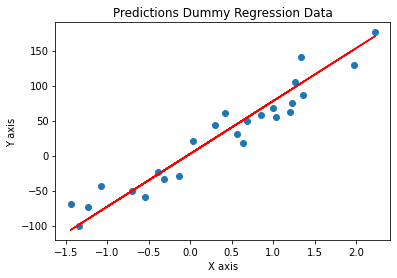

In [42]:
params = train(X_train, y_train)
y_preds = predict(X_test, params)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_preds, color="red")
plt.title("Predictions Dummy Regression Data")
plt.xlabel("X axis")
plt.ylabel("Y axis")